In [1]:
from utils import train_resnet as tr
from torch.utils.data import DataLoader, ConcatDataset
from torch.utils.data import random_split
import torch
from sklearn.model_selection import StratifiedKFold
import numpy as np
import matplotlib.pyplot as plt

In [2]:
loaders, datasets, info = tr.get_data_loaders('pneumoniamnist', return_datasets=True, im_size=224)

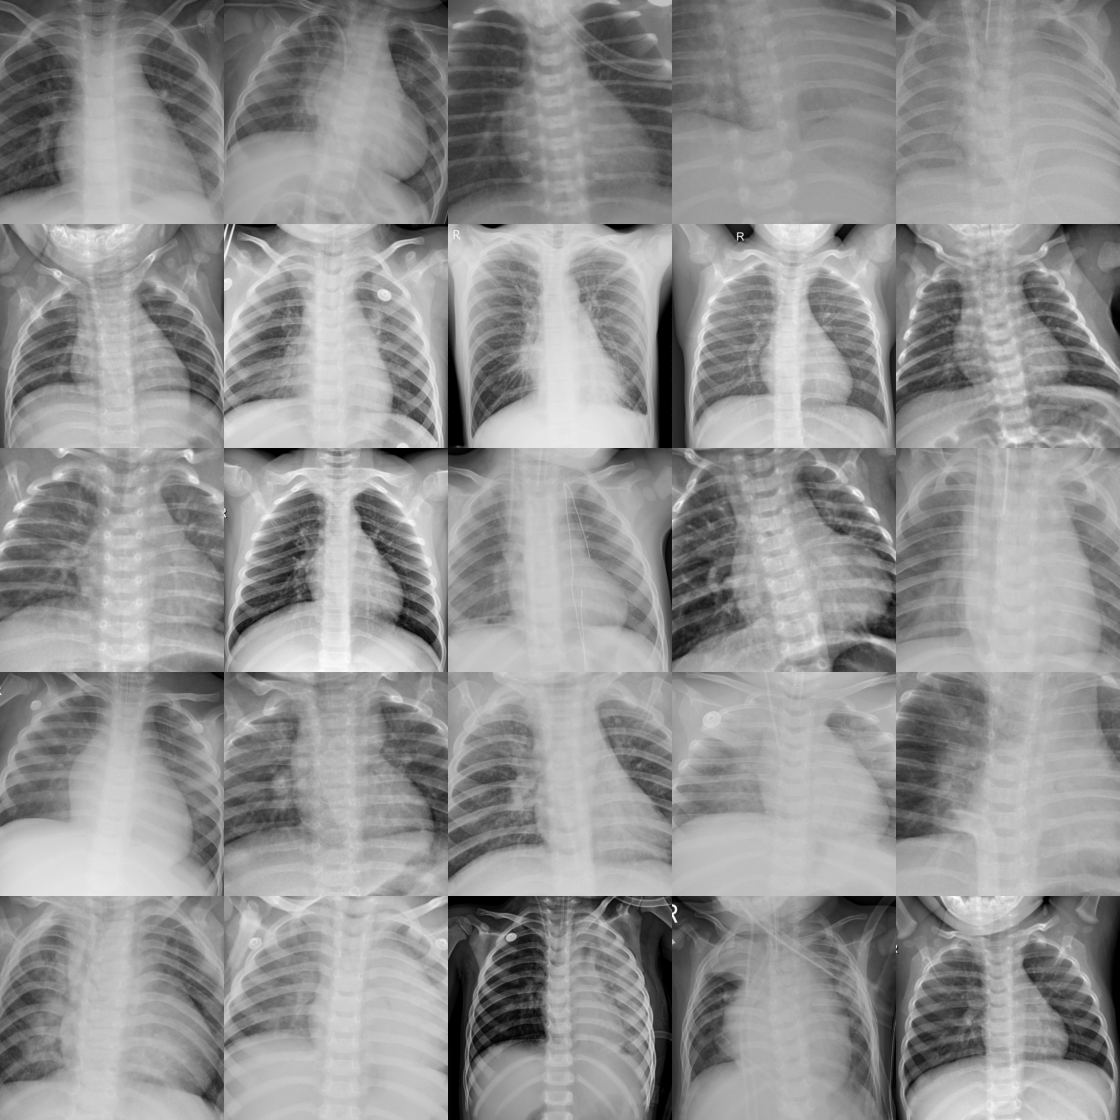

In [3]:
datasets[0].montage(length=5)

In [4]:
datasets[0]

Dataset PneumoniaMNIST of size 224 (pneumoniamnist_224)
    Number of datapoints: 4708
    Root location: /home/psteinmetz/.medmnist
    Split: train
    Task: binary-class
    Number of channels: 1
    Meaning of labels: {'0': 'normal', '1': 'pneumonia'}
    Number of samples: {'train': 4708, 'val': 524, 'test': 624}
    Description: The PneumoniaMNIST is based on a prior dataset of 5,856 pediatric chest X-Ray images. The task is binary-class classification of pneumonia against normal. We split the source training set with a ratio of 9:1 into training and validation set and use its source validation set as the test set. The source images are gray-scale, and their sizes are (384−2,916)×(127−2,713). We center-crop the images and resize them into 1×28×28.
    License: CC BY 4.0

In [5]:
# Combine train_dataset and val_dataset
combined_train_dataset = ConcatDataset([datasets[0], datasets[1]])

# Set the random seed for reproducibility
torch.manual_seed(42)

# Calculate the sizes for training and calibration datasets
train_size = int(0.8 * len(combined_train_dataset))
calibration_size = len(combined_train_dataset) - train_size

# Split the combined_train_dataset into training and calibration datasets
train_dataset, calibration_dataset = random_split(combined_train_dataset, [train_size, calibration_size])

# Create DataLoaders for the new training and calibration datasets
calibration_loader = DataLoader(dataset=calibration_dataset, batch_size=128, shuffle=False)

print(f'Training dataset size: {len(train_dataset)}')
print(f'Calibration dataset size: {len(calibration_dataset)}')

Training dataset size: 4185
Calibration dataset size: 1047


In [6]:
# Create stratified K-fold cross-validator
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Get the labels for stratification
labels = [label for _, label in train_dataset]

# Create a list to store the new dataloaders
train_loaders = []
val_loaders = []

for train_index, val_index in skf.split(np.zeros(len(labels)), labels):
    train_subset = torch.utils.data.Subset(train_dataset, train_index)
    val_subset = torch.utils.data.Subset(train_dataset, val_index)
    
    train_loader = DataLoader(dataset=train_subset, shuffle=True, drop_last=True, batch_size=32)
    val_loader = DataLoader(dataset=val_subset, shuffle=True, drop_last=True, batch_size=32)
    
    train_loaders.append(train_loader)
    val_loaders.append(val_loader)

In [7]:
test_loader = DataLoader(dataset=datasets[2], shuffle=False, batch_size=32)

MODEL 0
Train Epoch: 0 [0/3348 (0%)]	Loss: 0.698304
Train Epoch: 0 [320/3348 (10%)]	Loss: 0.188754
Train Epoch: 0 [640/3348 (19%)]	Loss: 0.049855
Train Epoch: 0 [960/3348 (29%)]	Loss: 0.143168
Train Epoch: 0 [1280/3348 (38%)]	Loss: 0.093508
Train Epoch: 0 [1600/3348 (48%)]	Loss: 0.066473
Train Epoch: 0 [1920/3348 (58%)]	Loss: 0.015309
Train Epoch: 0 [2240/3348 (67%)]	Loss: 0.017564
Train Epoch: 0 [2560/3348 (77%)]	Loss: 0.026156
Train Epoch: 0 [2880/3348 (87%)]	Loss: 0.017234
Train Epoch: 0 [3200/3348 (96%)]	Loss: 0.006923

Validation set: Average loss: 0.0498, Accuracy: 822/837 (98%)

Train Epoch: 1 [0/3348 (0%)]	Loss: 0.081974
Train Epoch: 1 [320/3348 (10%)]	Loss: 0.032883
Train Epoch: 1 [640/3348 (19%)]	Loss: 0.010972
Train Epoch: 1 [960/3348 (29%)]	Loss: 0.005916
Train Epoch: 1 [1280/3348 (38%)]	Loss: 0.003263
Train Epoch: 1 [1600/3348 (48%)]	Loss: 0.033253
Train Epoch: 1 [1920/3348 (58%)]	Loss: 0.046489
Train Epoch: 1 [2240/3348 (67%)]	Loss: 0.002669
Train Epoch: 1 [2560/3348 (77%

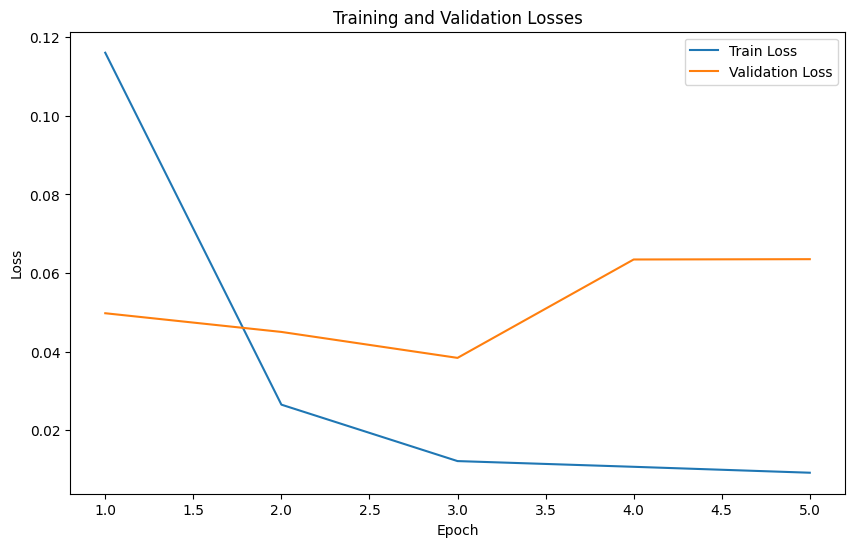

Accuracy: 0.853
Balanced Accuracy: 0.803
AUC: 0.961


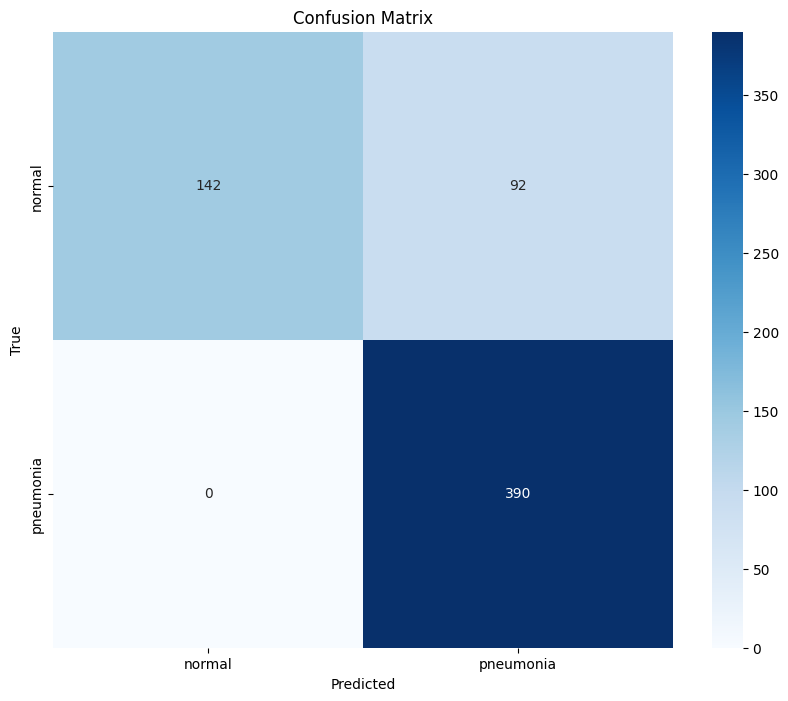

MODEL 1
Train Epoch: 0 [0/3348 (0%)]	Loss: 0.647074
Train Epoch: 0 [320/3348 (10%)]	Loss: 0.281490
Train Epoch: 0 [640/3348 (19%)]	Loss: 0.046220
Train Epoch: 0 [960/3348 (29%)]	Loss: 0.028902
Train Epoch: 0 [1280/3348 (38%)]	Loss: 0.036569
Train Epoch: 0 [1600/3348 (48%)]	Loss: 0.145314
Train Epoch: 0 [1920/3348 (58%)]	Loss: 0.123150
Train Epoch: 0 [2240/3348 (67%)]	Loss: 0.088461
Train Epoch: 0 [2560/3348 (77%)]	Loss: 0.027735
Train Epoch: 0 [2880/3348 (87%)]	Loss: 0.119160
Train Epoch: 0 [3200/3348 (96%)]	Loss: 0.023204

Validation set: Average loss: 0.0607, Accuracy: 815/837 (97%)

Train Epoch: 1 [0/3348 (0%)]	Loss: 0.021343
Train Epoch: 1 [320/3348 (10%)]	Loss: 0.058047
Train Epoch: 1 [640/3348 (19%)]	Loss: 0.001850
Train Epoch: 1 [960/3348 (29%)]	Loss: 0.009543
Train Epoch: 1 [1280/3348 (38%)]	Loss: 0.003076
Train Epoch: 1 [1600/3348 (48%)]	Loss: 0.002568
Train Epoch: 1 [1920/3348 (58%)]	Loss: 0.004774
Train Epoch: 1 [2240/3348 (67%)]	Loss: 0.007755
Train Epoch: 1 [2560/3348 (77%

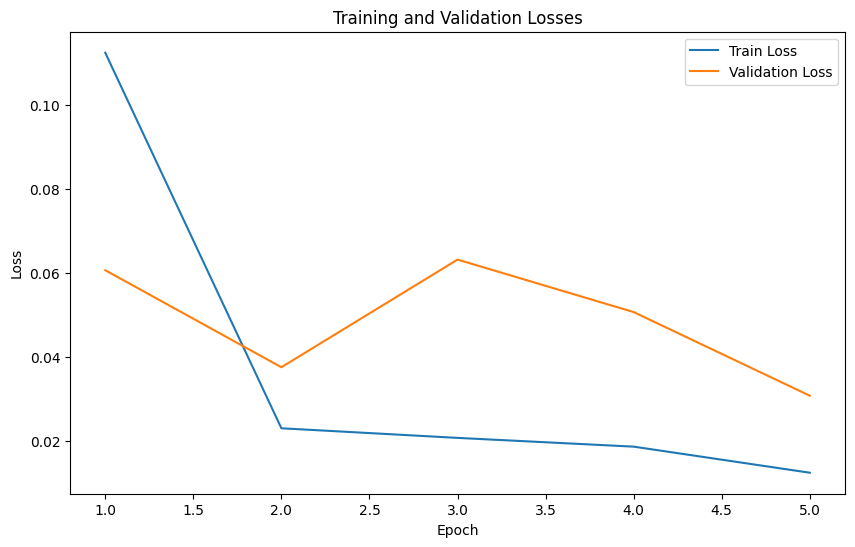

Accuracy: 0.918
Balanced Accuracy: 0.893
AUC: 0.977


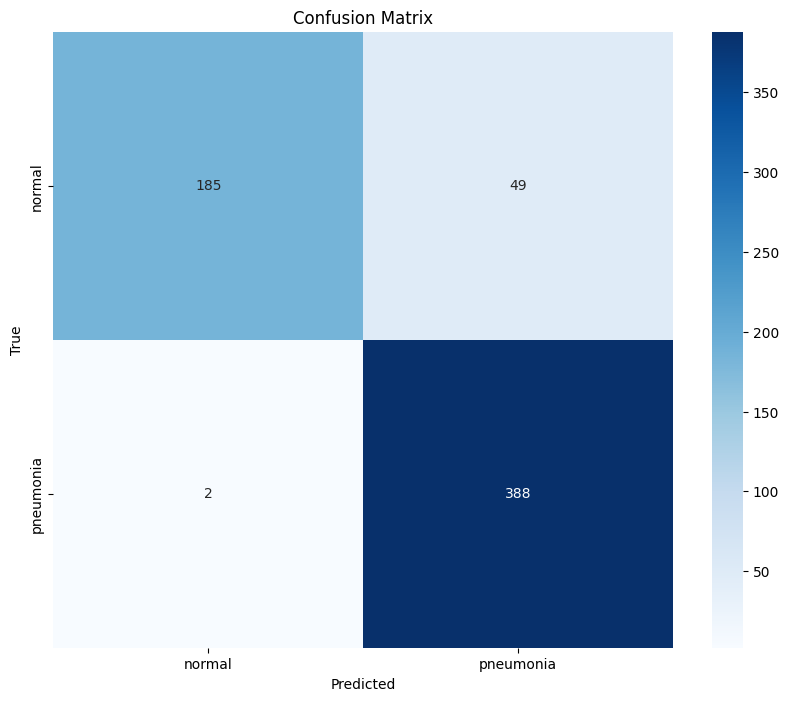

MODEL 2
Train Epoch: 0 [0/3348 (0%)]	Loss: 0.694916
Train Epoch: 0 [320/3348 (10%)]	Loss: 0.189094
Train Epoch: 0 [640/3348 (19%)]	Loss: 0.105167
Train Epoch: 0 [960/3348 (29%)]	Loss: 0.126637
Train Epoch: 0 [1280/3348 (38%)]	Loss: 0.066541
Train Epoch: 0 [1600/3348 (48%)]	Loss: 0.196587
Train Epoch: 0 [1920/3348 (58%)]	Loss: 0.005893
Train Epoch: 0 [2240/3348 (67%)]	Loss: 0.131213
Train Epoch: 0 [2560/3348 (77%)]	Loss: 0.007740
Train Epoch: 0 [2880/3348 (87%)]	Loss: 0.196973
Train Epoch: 0 [3200/3348 (96%)]	Loss: 0.048202

Validation set: Average loss: 0.1622, Accuracy: 784/837 (94%)

Train Epoch: 1 [0/3348 (0%)]	Loss: 0.013518
Train Epoch: 1 [320/3348 (10%)]	Loss: 0.022519
Train Epoch: 1 [640/3348 (19%)]	Loss: 0.063644
Train Epoch: 1 [960/3348 (29%)]	Loss: 0.046555
Train Epoch: 1 [1280/3348 (38%)]	Loss: 0.013623
Train Epoch: 1 [1600/3348 (48%)]	Loss: 0.021624
Train Epoch: 1 [1920/3348 (58%)]	Loss: 0.004833
Train Epoch: 1 [2240/3348 (67%)]	Loss: 0.002107
Train Epoch: 1 [2560/3348 (77%

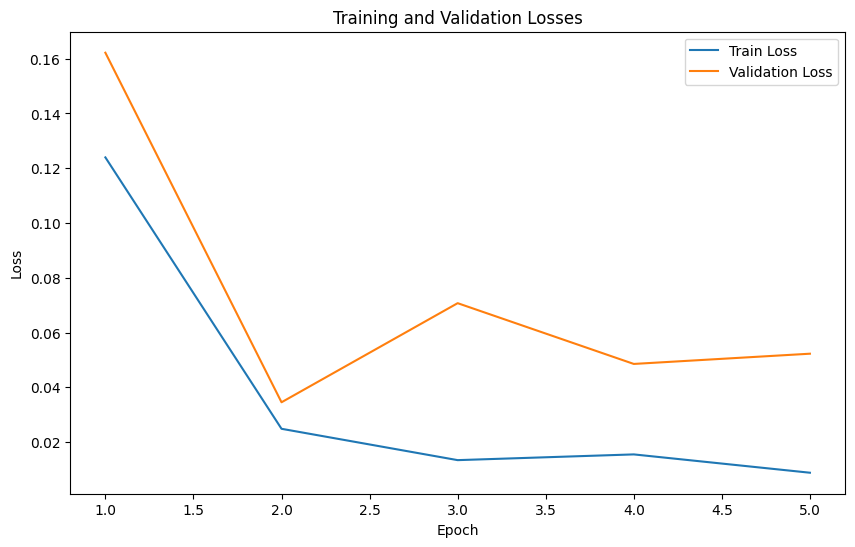

Accuracy: 0.912
Balanced Accuracy: 0.883
AUC: 0.987


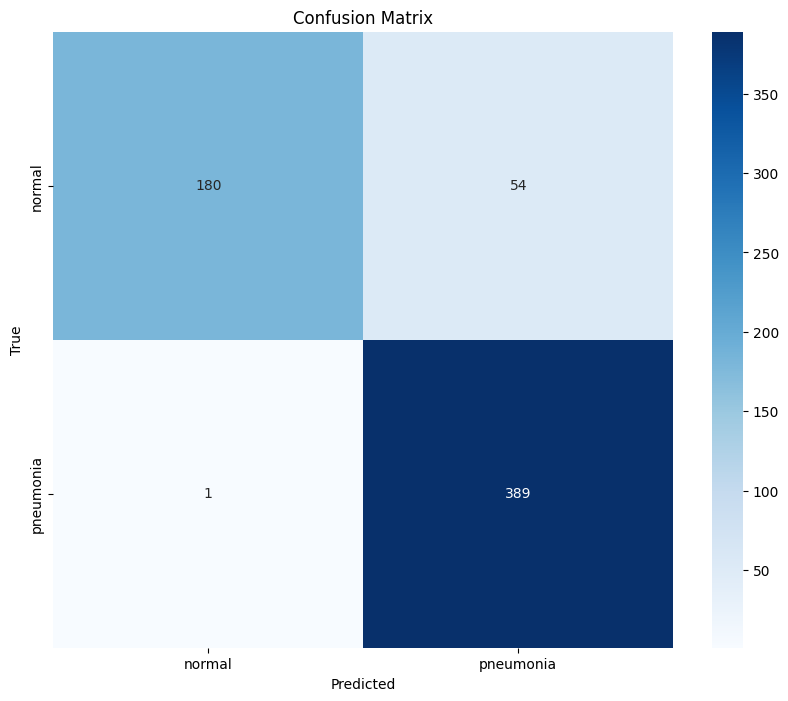

MODEL 3
Train Epoch: 0 [0/3348 (0%)]	Loss: 0.718056
Train Epoch: 0 [320/3348 (10%)]	Loss: 0.273530
Train Epoch: 0 [640/3348 (19%)]	Loss: 0.194320
Train Epoch: 0 [960/3348 (29%)]	Loss: 0.250421
Train Epoch: 0 [1280/3348 (38%)]	Loss: 0.029947
Train Epoch: 0 [1600/3348 (48%)]	Loss: 0.034544
Train Epoch: 0 [1920/3348 (58%)]	Loss: 0.157960
Train Epoch: 0 [2240/3348 (67%)]	Loss: 0.011855
Train Epoch: 0 [2560/3348 (77%)]	Loss: 0.057800
Train Epoch: 0 [2880/3348 (87%)]	Loss: 0.096950
Train Epoch: 0 [3200/3348 (96%)]	Loss: 0.015000

Validation set: Average loss: 0.0673, Accuracy: 815/837 (97%)

Train Epoch: 1 [0/3348 (0%)]	Loss: 0.019486
Train Epoch: 1 [320/3348 (10%)]	Loss: 0.026932
Train Epoch: 1 [640/3348 (19%)]	Loss: 0.006349
Train Epoch: 1 [960/3348 (29%)]	Loss: 0.105039
Train Epoch: 1 [1280/3348 (38%)]	Loss: 0.009544
Train Epoch: 1 [1600/3348 (48%)]	Loss: 0.004128
Train Epoch: 1 [1920/3348 (58%)]	Loss: 0.022649
Train Epoch: 1 [2240/3348 (67%)]	Loss: 0.004777
Train Epoch: 1 [2560/3348 (77%

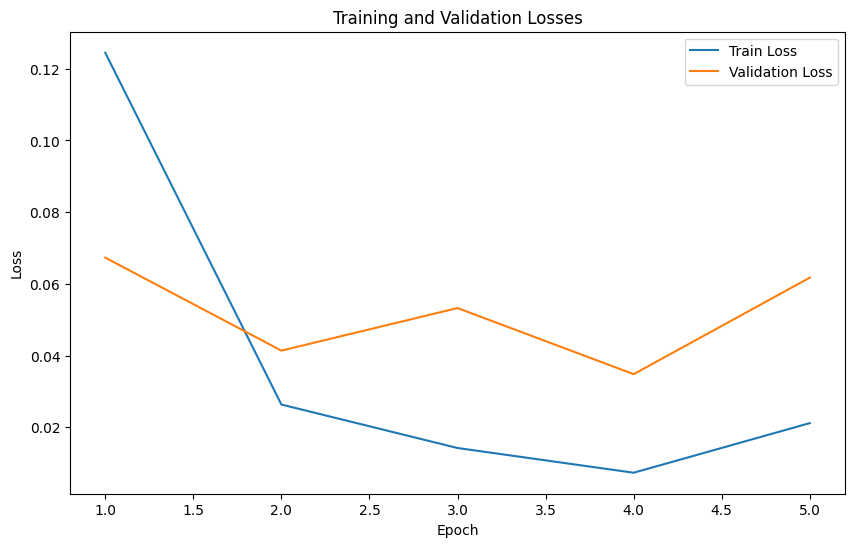

Accuracy: 0.931
Balanced Accuracy: 0.910
AUC: 0.989


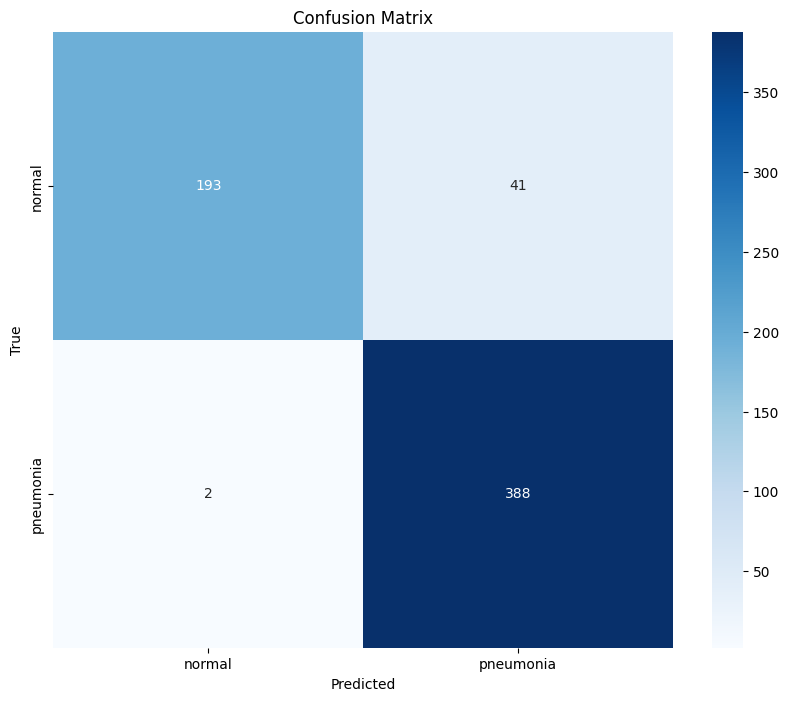

MODEL 4
Train Epoch: 0 [0/3348 (0%)]	Loss: 0.666168
Train Epoch: 0 [320/3348 (10%)]	Loss: 0.320911
Train Epoch: 0 [640/3348 (19%)]	Loss: 0.337150
Train Epoch: 0 [960/3348 (29%)]	Loss: 0.032081
Train Epoch: 0 [1280/3348 (38%)]	Loss: 0.084695
Train Epoch: 0 [1600/3348 (48%)]	Loss: 0.043745
Train Epoch: 0 [1920/3348 (58%)]	Loss: 0.011190
Train Epoch: 0 [2240/3348 (67%)]	Loss: 0.163646
Train Epoch: 0 [2560/3348 (77%)]	Loss: 0.198359
Train Epoch: 0 [2880/3348 (87%)]	Loss: 0.020964
Train Epoch: 0 [3200/3348 (96%)]	Loss: 0.011387

Validation set: Average loss: 0.0476, Accuracy: 815/837 (97%)

Train Epoch: 1 [0/3348 (0%)]	Loss: 0.016824
Train Epoch: 1 [320/3348 (10%)]	Loss: 0.011047
Train Epoch: 1 [640/3348 (19%)]	Loss: 0.019202
Train Epoch: 1 [960/3348 (29%)]	Loss: 0.017914
Train Epoch: 1 [1280/3348 (38%)]	Loss: 0.004415
Train Epoch: 1 [1600/3348 (48%)]	Loss: 0.003724
Train Epoch: 1 [1920/3348 (58%)]	Loss: 0.004795
Train Epoch: 1 [2240/3348 (67%)]	Loss: 0.078912
Train Epoch: 1 [2560/3348 (77%

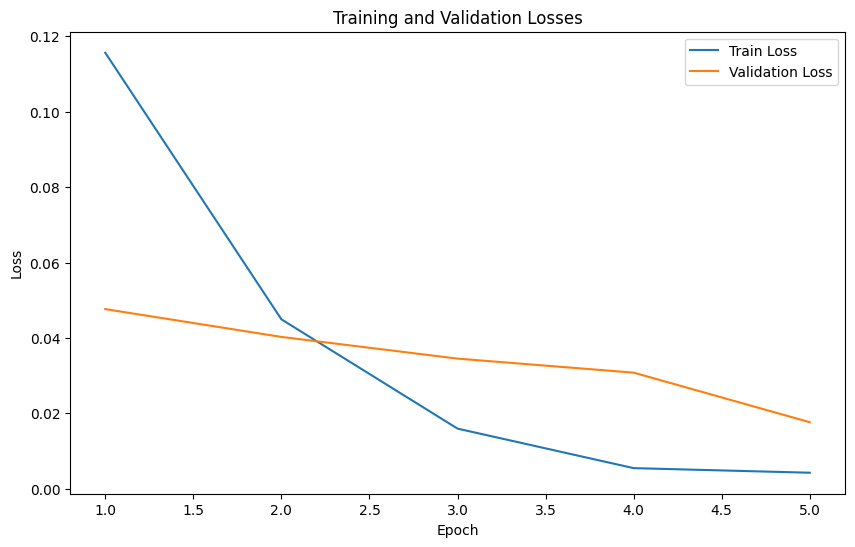

Accuracy: 0.902
Balanced Accuracy: 0.871
AUC: 0.989


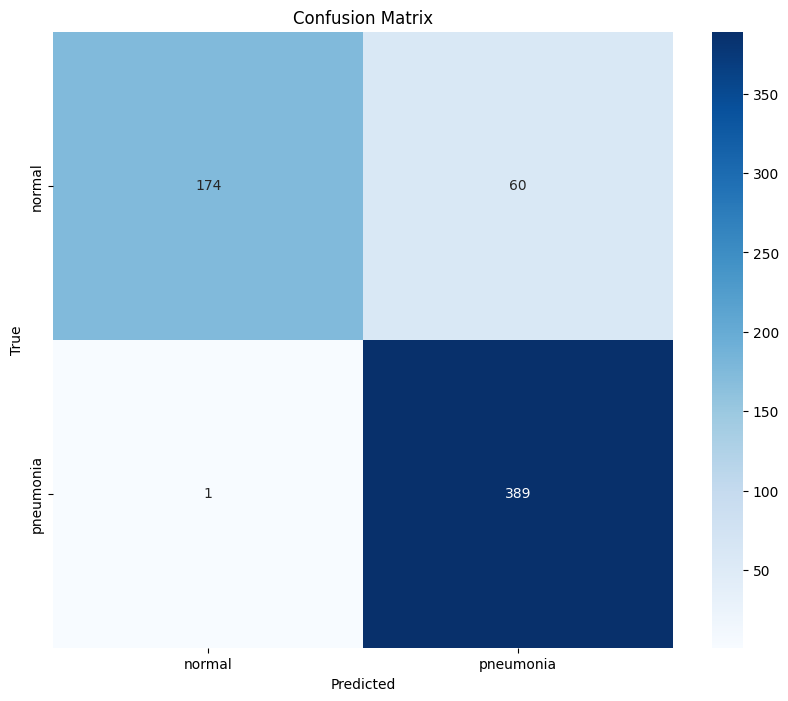

In [8]:
models = []
for i in range(5):
    print('MODEL ' + str(i))
    model = tr.train_resnet18(
        'pneumoniamnist',
        train_loader=train_loaders[i],
        val_loader=val_loaders[i],
        test_loader=test_loader,
        num_epochs=5,    
        learning_rate=0.0001,
        random_seed=42  # Set a fixed seed for reproducibility
    )
    models.append(model)

Accuracy: 0.920
Balanced Accuracy: 0.893
AUC: 0.990


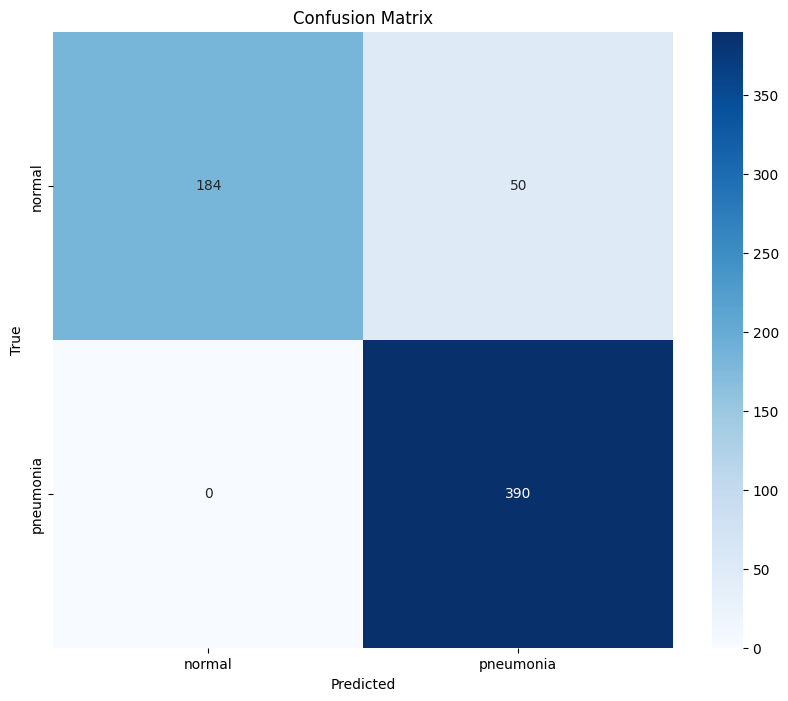

In [9]:
tr.evaluate_model(model=models, test_loader=test_loader, data_flag='pneumoniamnist')

In [ ]:
for i, model in enumerate(models):
    tr.save_model(model, path=f'models/224x224/resnet18_pneumoniamnist224_{i}.pt')

Model saved to models/224x224/resnet18_pneumoniamnist2240.pt
Model saved to models/224x224/resnet18_pneumoniamnist2241.pt
Model saved to models/224x224/resnet18_pneumoniamnist2242.pt
Model saved to models/224x224/resnet18_pneumoniamnist2243.pt
Model saved to models/224x224/resnet18_pneumoniamnist2244.pt
